Read and check the raw data

In [1]:
import pandas as pd

data = pd.read_csv('data/heart_disease_data.csv')

data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
data.shape

(918, 12)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
target = 'HeartDisease'

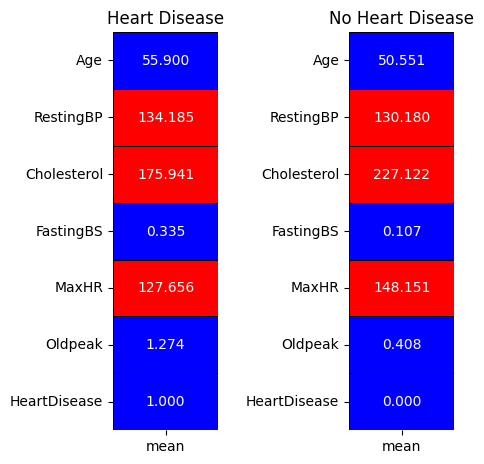

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

yes = data[data[target] == 1].describe().T
no = data[data[target] == 0].describe().T
colors = ['blue','red']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.3f',)
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.3f')
plt.title('No Heart Disease')

fig.tight_layout(pad = 2)

/Users/banubilmez/.local/share/virtualenvs/MLOps_final_project-MLW27GkW/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/banubilmez/.local/share/virtualenvs/MLOps_final_project-MLW27GkW/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/banubilmez/.local/share/virtualenvs/MLOps_final_project-MLW27GkW/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/banubilmez/.local/share/virtualenvs/MLOps_final_project-MLW27GkW/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/banubilmez/.local/share/virtualenvs/MLOps_final_project-MLW27GkW/lib/python3.9/site-packages/seaborn/axis

<Figure size 475x455 with 0 Axes>

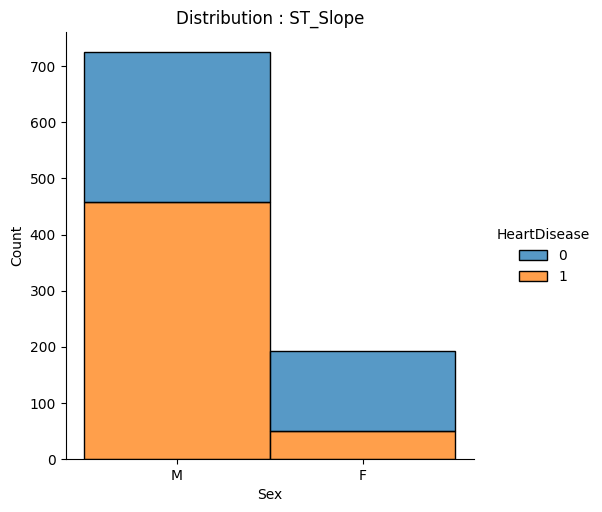

<Figure size 475x455 with 0 Axes>

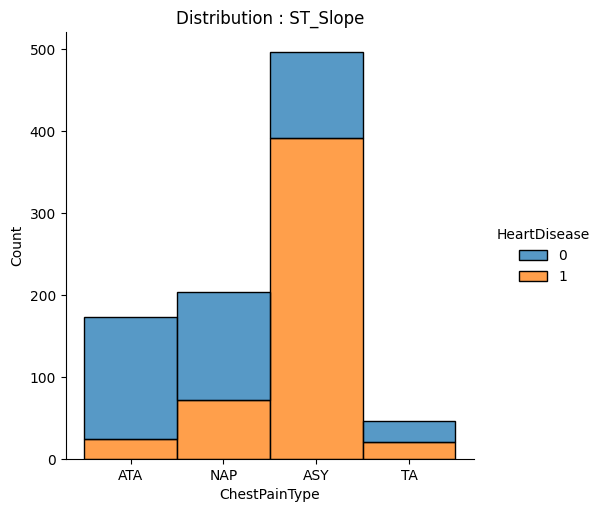

<Figure size 475x455 with 0 Axes>

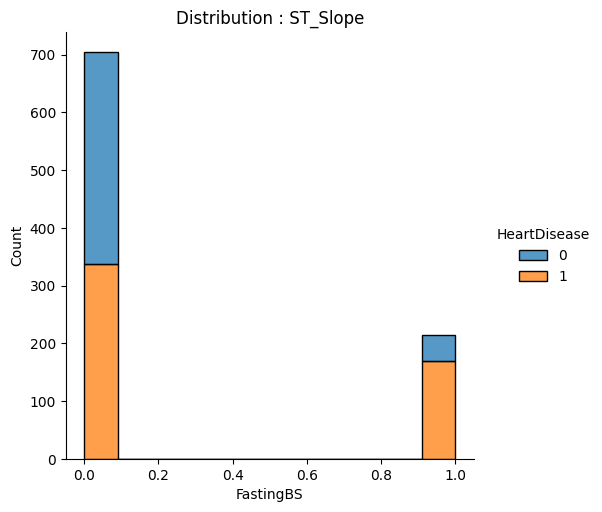

<Figure size 475x455 with 0 Axes>

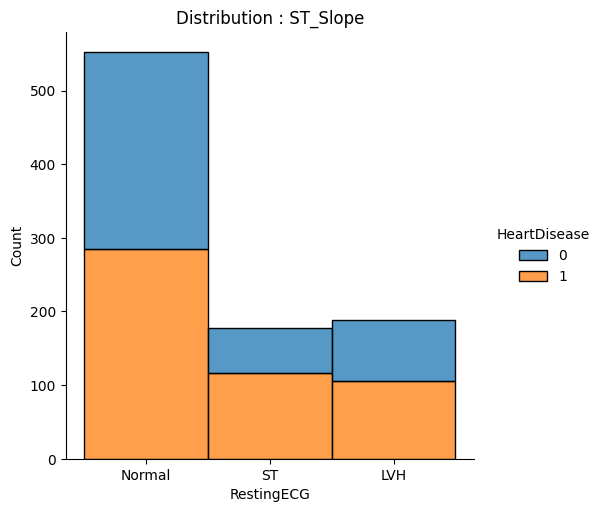

<Figure size 475x455 with 0 Axes>

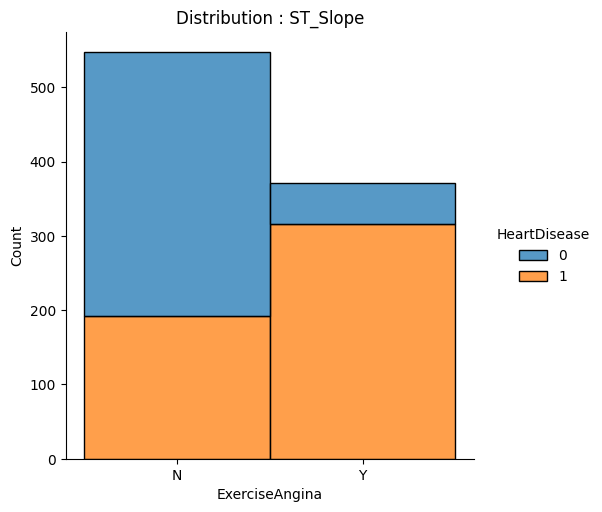

In [9]:
for i in range(len(categorical_features) - 1):
        
    plt.figure(figsize = (4.75,4.55))
    sns.displot(data=data, x=categorical_features[i], hue=target, multiple="stack")
    title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
    plt.title(title)

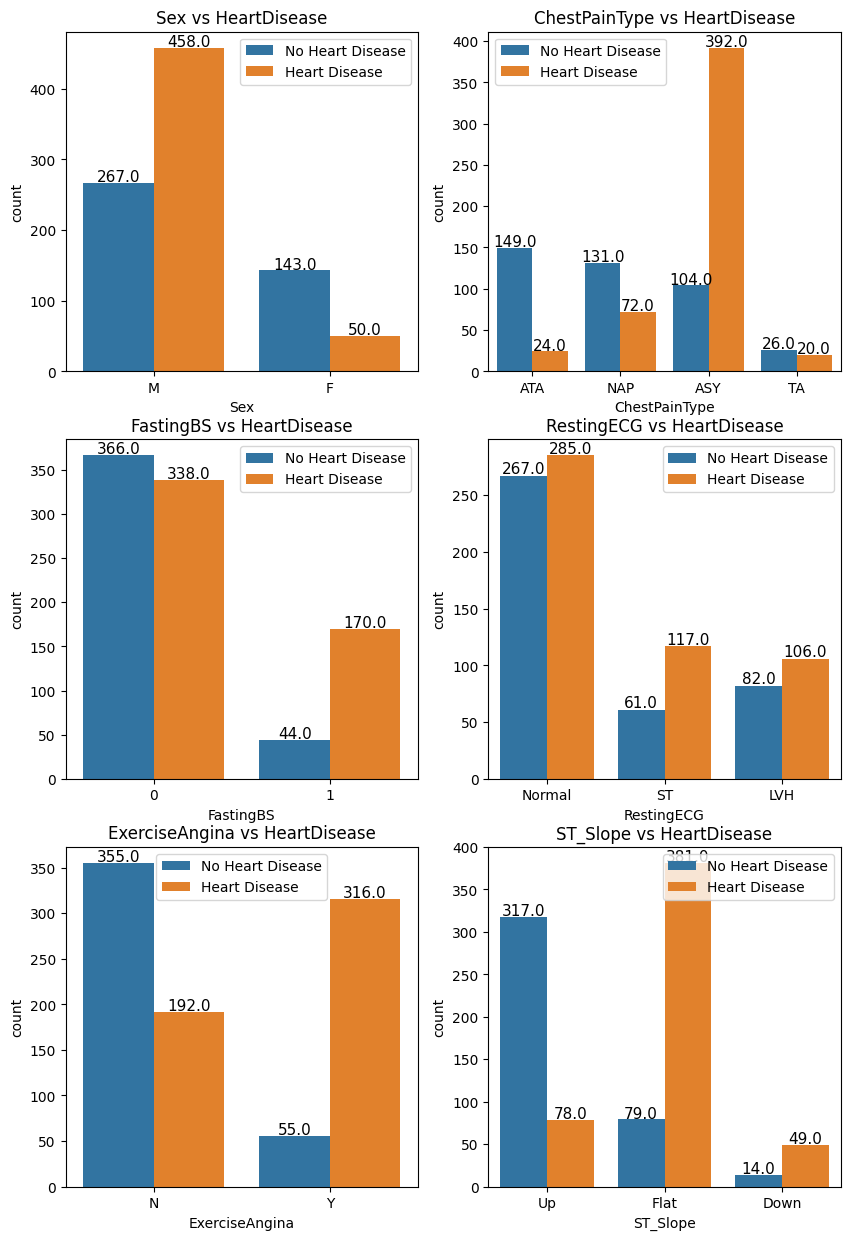

In [10]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features)):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(data=data, x=categorical_features[i], hue=target)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title)

Feature Engineering

In [11]:
correlation_matrix = data[numerical_features].corr()
correlation_matrix

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000


In [12]:
import numpy as np
from scipy.stats import chi2_contingency

for i in range(len(categorical_features)):
    contingency_table = pd.crosstab(data[categorical_features[i]], data[target])

    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramer_v = np.sqrt(phi2 / min((k - 1), (r - 1)))

    print(f"Cramer's V: {cramer_v} and P-value: {p_value} for {categorical_features[i]} and Heart Disease")


Cramer's V: 0.30275622279754005 and P-value: 4.5976174508091635e-20 for Sex and Heart Disease
Cramer's V: 0.5403815716169053 and P-value: 8.08372842808765e-58 for ChestPainType and Heart Disease
Cramer's V: 0.26470001743528276 and P-value: 1.0573018731809955e-15 for FastingBS and Heart Disease
Cramer's V: 0.10912341027519352 and P-value: 0.0042292328167544925 for RestingECG and Heart Disease
Cramer's V: 0.4920494053821572 and P-value: 2.907808387659878e-50 for ExerciseAngina and Heart Disease
Cramer's V: 0.6226642132252813 and P-value: 5.167637689470128e-78 for ST_Slope and Heart Disease


In [13]:
from scipy.stats import pointbiserialr

for i in range(len(numerical_features)):
    
    correlation, p_value = pointbiserialr(data[target], data[numerical_features[i]])
    print(f"Point-Biserial Correlation: {correlation} and P-value: {p_value} for {numerical_features[i]} and Heart Disease")

Point-Biserial Correlation: 0.2820385058189966 and P-value: 3.0079532400504997e-18 for Age and Heart Disease
Point-Biserial Correlation: 0.1075889803714038 and P-value: 0.0010953145851723873 for RestingBP and Heart Disease
Point-Biserial Correlation: -0.23274063892701086 and P-value: 9.30830888353444e-13 for Cholesterol and Heart Disease
Point-Biserial Correlation: -0.40042076946318955 and P-value: 1.1377859840282944e-36 for MaxHR and Heart Disease
Point-Biserial Correlation: 0.4039507220628838 and P-value: 2.390772424061832e-37 for Oldpeak and Heart Disease


In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(target, axis=1)
y = data[target]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
from sklearn.feature_extraction import DictVectorizer

train_dicts = x_train.to_dict(orient='records')
test_dicts = x_test.to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

